In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("/kaggle/input/playground-series-s5e3/train.csv")
df_test = pd.read_csv("/kaggle/input/playground-series-s5e3/test.csv")
df_submission = pd.read_csv("/kaggle/input/playground-series-s5e3/sample_submission.csv")

In [3]:
df_train.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [4]:
df_test.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4


In [5]:
df_submission.head()

,id,rainfall
0,2190,0
1,2191,0
2,2192,0
3,2193,0
4,2194,0


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.5 KB


In [7]:
df_train[df_train["id"]==0]

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1


In [8]:
df_train.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

<Axes: xlabel='rainfall'>

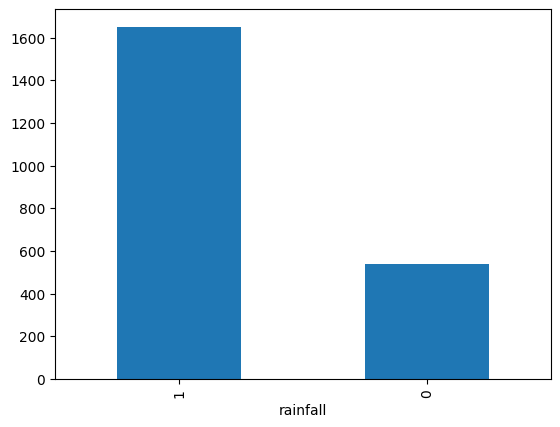

In [9]:
df_train["rainfall"].value_counts().plot(kind="bar")

<Axes: ylabel='Frequency'>

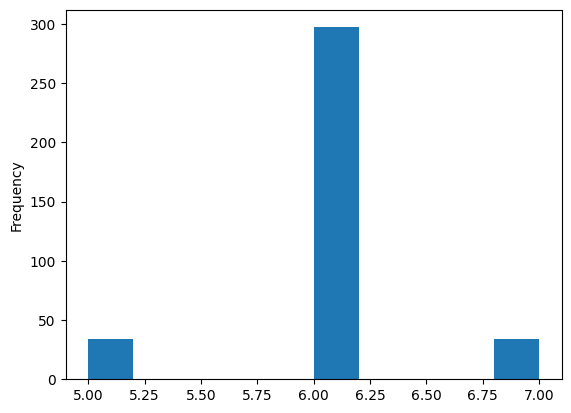

In [10]:
df_train["day"].value_counts().plot(kind="hist")

In [11]:
df_train_2= df_train.drop(columns=["id"])

In [12]:
df_train_2.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed',
       'rainfall'],
      dtype='object')

In [13]:
from imblearn.over_sampling import SMOTE



X = df_train_2.drop('rainfall', axis=1)
y = df_train_2['rainfall']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [14]:
print(X.shape)
print(y.shape)
print(X_resampled.shape)
print(y_resampled.shape)

(2190, 11)
(2190,)
(3300, 11)
(3300,)


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train your model (e.g., a Random Forest classifier)
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       328
           1       0.92      0.91      0.91       332

    accuracy                           0.92       660
   macro avg       0.92      0.92      0.92       660
weighted avg       0.92      0.92      0.92       660



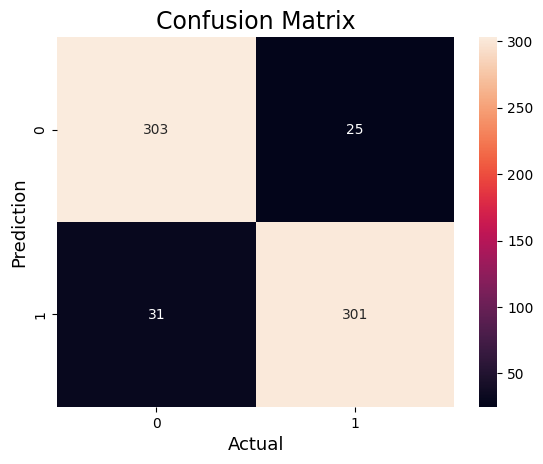

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


cm = confusion_matrix(y_test,y_pred)

#Plot the confusion matrix.

sns.heatmap(cm,
            annot=True,
            fmt='g',
            # xticklabels=['Dog','Not Dog'],
            # yticklabels=['Dog','Not Dog']
           )
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [17]:
df_test.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4


In [18]:
df_test_2= df_test.drop(columns=["id"])

In [19]:
df_test_2.isna().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        0
dtype: int64

In [20]:
df_test_2[df_test_2["winddirection"].isna()]

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
517,153,1007.8,32.9,30.6,28.9,22.0,65.0,75.0,8.2,NaN,17.2


In [21]:
df_test_2["winddirection"].mode().values[0]

70.0

In [22]:
wind_mode= df_test_2["winddirection"].mode().values[0]
df_test_2["winddirection"] = df_test_2["winddirection"].fillna(value=wind_mode)

In [23]:
df_test_pred = clf.predict(df_test_2)

In [24]:
df_test_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [25]:
df_test["id"]

0      2190
1      2191
2      2192
3      2193
4      2194
       ... 
725    2915
726    2916
727    2917
728    2918
729    2919
Name: id, Length: 730, dtype: int64

In [26]:
# Creating a DataFrame from the Series
df_test_predictions = pd.DataFrame({'id': df_test["id"], 'Rainfall': df_test_pred})

In [27]:
df_test_predictions

,id,Rainfall
0,2190,1
1,2191,1
2,2192,1
3,2193,0
4,2194,0
...,...,...
725,2915,1
726,2916,1
727,2917,1
728,2918,1


In [28]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming X_resampled and y_resampled are your resampled data

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

def objective(trial):
    """Objective function for Optuna."""
    n_estimators = trial.suggest_int("n_estimators", 50, 500)
    max_depth = trial.suggest_int("max_depth", 3, 20)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2"]) #or suggest_float for a percentage

    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
    )

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    return report["weighted avg"]["f1-score"]  # Optimize for F1-score

study = optuna.create_study(direction="maximize")  # Maximize F1-score
study.optimize(objective, n_trials=50)  # Adjust n_trials as needed

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

# Train the final model with the best hyperparameters
best_clf = RandomForestClassifier(
    n_estimators=trial.params["n_estimators"],
    max_depth=trial.params["max_depth"],
    min_samples_split=trial.params["min_samples_split"],
    min_samples_leaf=trial.params["min_samples_leaf"],
    max_features=trial.params["max_features"],
    random_state=42,
)

best_clf.fit(X_resampled, y_resampled)
# best_y_pred = best_clf.predict(X_test)
# print("\nClassification Report (Best Model):")
# print(classification_report(y_test, best_y_pred))

[I 2025-03-07 09:45:58,315] A new study created in memory with name: no-name-8ff9929d-f618-4bca-a250-2e054aa35e7f
[I 2025-03-07 09:45:58,996] Trial 0 finished with value: 0.8560060553859002 and parameters: {'n_estimators': 202, 'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8560060553859002.
[I 2025-03-07 09:46:00,998] Trial 1 finished with value: 0.8863205700415003 and parameters: {'n_estimators': 354, 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 1 with value: 0.8863205700415003.
[I 2025-03-07 09:46:02,267] Trial 2 finished with value: 0.8908850408850408 and parameters: {'n_estimators': 214, 'max_depth': 19, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.8908850408850408.
[I 2025-03-07 09:46:04,868] Trial 3 finished with value: 0.8832741036485027 and parameters: {'n_estimators': 478, 'max_depth': 8, 'mi

Number of finished trials:  50
Best trial:
  Value:  0.9151515151515152
  Params: 
    n_estimators: 450
    max_depth: 19
    min_samples_split: 3
    min_samples_leaf: 1
    max_features: log2


RandomForestClassifier(max_depth=19, max_features='log2', min_samples_split=3,
                       n_estimators=450, random_state=42)

In [29]:
df_test_pred = best_clf.predict(df_test_2)
df_test_predictions = pd.DataFrame({'id': df_test["id"], 'rainfall': df_test_pred})

In [30]:
df_test_predictions

,id,rainfall
0,2190,1
1,2191,1
2,2192,1
3,2193,0
4,2194,0
...,...,...
725,2915,1
726,2916,1
727,2917,1
728,2918,1


In [31]:
df_test_predictions.to_csv("submission.csv",index=False)


Feature Importances:
          Feature  Importance
7           cloud    0.288421
8        sunshine    0.179069
6        humidity    0.145490
5        dewpoint    0.056578
2         maxtemp    0.052078
0             day    0.051061
1        pressure    0.050499
10      windspeed    0.048676
4         mintemp    0.046510
3     temparature    0.044750
9   winddirection    0.036869


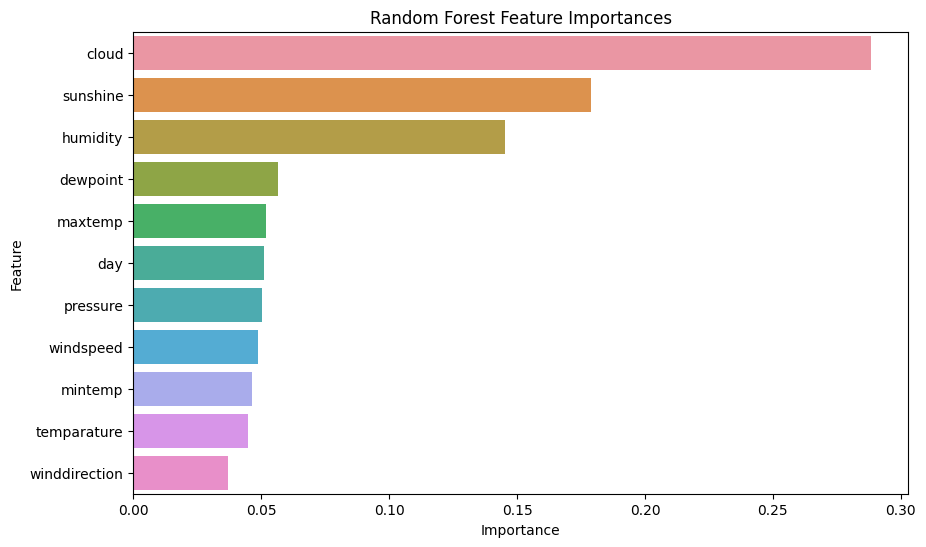

In [32]:
feature_importances = best_clf.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame(
    {"Feature": X_resampled.columns, "Importance": feature_importances}
)

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(
    by="Importance", ascending=False
)

# Print or visualize feature importances
print("\nFeature Importances:")
print(feature_importance_df)

# Visualize feature importances (optional)
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Random Forest Feature Importances")
plt.show()